In [1]:
#pip install hvplot

In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df= pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data


In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_markets_scaled= StandardScaler().fit_transform(market_data_df)     
df_markets_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [7]:
# Convert the numpy array to a pandas DataFrame
df_markets_scaled = pd.DataFrame(df_markets_scaled, index=market_data_df.index)

# Display the DataFrame
df_markets_scaled.head(3)

,0,1,2,3,4,5,6
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061


In [8]:
# Create a DataFrame with the scaled data
df_markets_scaled.columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                             "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                             "price_change_percentage_1y"]		
# Copy the crypto names from the original data
df_markets_scaled["coinid"] = df_markets_scaled.index

# Set the coinid column as index
df_markets_scaled.set_index("coinid", inplace=True)

# Display sample data
df_markets_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.


In [9]:
df_markets_scaled.head(10)
# Create an empty list to store the inertia values
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []
k=list(range(1,11))
# Create a for loop to compute the inertia with each possible value of k
    # Inside the loop:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        # 2. Fit the model to the data using the scaled DataFrame
        # 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(df_markets_scaled)
    inertia.append(model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data ={
    "k": k,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
# Display the DataFrame
df_elbow

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

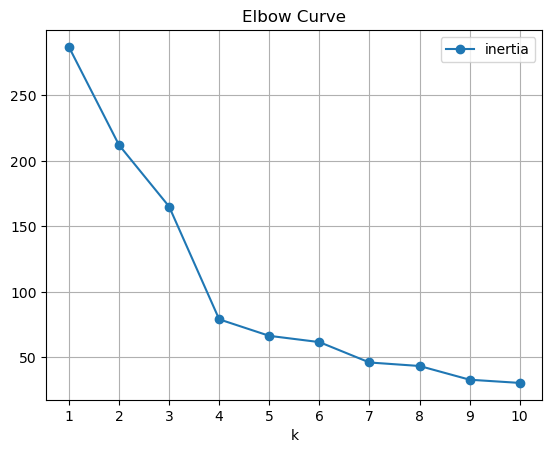

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x='k',
                    y='inertia',
                    title='Elbow Curve',
                    xticks=k,
                    marker='o',
                    grid=True,
                   )

In [11]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 26.09%
Percentage decrease from k=2 to k=3: 22.15%
Percentage decrease from k=3 to k=4: 52.15%
Percentage decrease from k=4 to k=5: 15.96%
Percentage decrease from k=5 to k=6: 7.20%
Percentage decrease from k=6 to k=7: 25.25%
Percentage decrease from k=7 to k=8: 5.82%
Percentage decrease from k=8 to k=9: 24.15%
Percentage decrease from k=9 to k=10: 7.43%


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:**
the largest reduction, in inertia, or slope, occurs where k=4, therefore that would be the optimal value for 'k'.
This is verified by checking the percent change between the k-values: "Percentage decrease from k=3 to k=4: 52.15%'


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.


In [12]:
# Initialize the K-Means model using the best value for k
model= KMeans(n_clusters=4, n_init='auto', random_state=42)

In [13]:
# Fit the K-Means model using the scaled data
# Predict the clusters to group the cryptocurrencies using the scaled data
model.fit_predict(df_markets_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [14]:
# View the resulting array of cluster values.
df_markets_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [15]:
# Create a copy of the DataFrame
df2_markets_scaled = df_markets_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df2_markets_scaled["clusters"] = model.labels_

# Display sample data
df2_markets_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

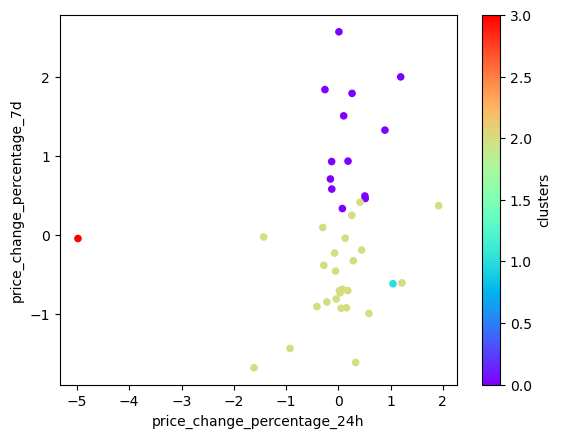

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
df2_markets_scaled.plot.scatter(x= "price_change_percentage_24h",
                                y= "price_change_percentage_7d",
                                c= "clusters",
                                colormap="rainbow",
                                )

### Optimize Clusters with Principal Component Analysis.


In [18]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca= PCA(n_components=3)

# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_market_data_df= pca.fit_transform(df_markets_scaled)

# View the first five rows of the DataFrame. 
pca_market_data_df[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [20]:
pca.explained_variance_ratio_.sum()

0.8950316570309841

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 0.8950316570309841, or 89.5032%. This means that these three components capture 89.5032% of the total variance in the dataset.


## Note: The code for this step is provided for you:
the comment below says the code is provided, but it is not. 

In [21]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Copy the crypto names from the original data

pca2_df=pd.DataFrame(
    pca_market_data_df,
    columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"],
    index=df_markets_scaled.index
)
# Display sample data
pca2_df.head(5)

,Principal Component 1,Principal Component 2,Principal Component 3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data


In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []
k=list(range(1,11)) 

# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using PCA DataFrame.
    # 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model= KMeans(n_clusters=i,
                    n_init='auto',
                    random_state=42
                    )
    k_model.fit(pca2_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data2={'k': k,
              'inertia': inertia
              }
df_elbow2=pd.DataFrame(elbow_data2)
# Display the DataFrame
df_elbow2.head(10)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

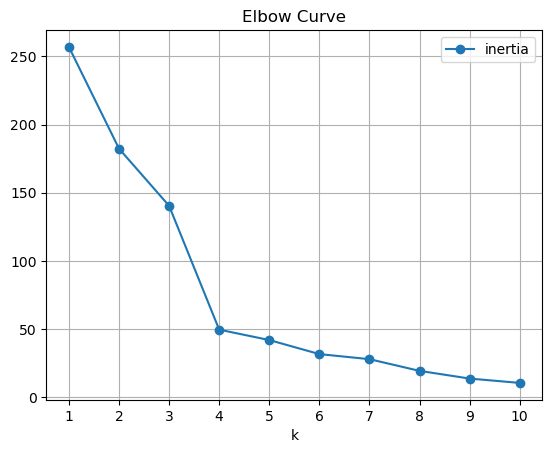

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
market_data_df= pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
df_elbow2.plot.line(x='k',
                    y='inertia',
                    title='Elbow Curve',
                    xticks=k,
                    marker='o',
                    grid=True,
                   )

In [24]:
# Calculate the percentage change in inertia
df_elbow2['percent_change'] = df_elbow2['inertia'].pct_change() * 100
df_elbow2['percent_change'] = df_elbow2['percent_change'].apply(lambda x: '{:.2f}%'.format(x))
df_elbow2['percent_change'].iloc[0] = 0
df_elbow2

C:\Users\mikea\AppData\Local\Temp\ipykernel_9956\3638189127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elbow2['percent_change'].iloc[0] = 0


,k,inertia,percent_change
0,1,256.874086,0
1,2,182.339530,-29.02%
2,3,140.431833,-22.98%
3,4,49.665497,-64.63%
4,5,42.051901,-15.33%
5,6,31.749005,-24.50%
6,7,28.031869,-11.71%
7,8,19.451747,-30.61%
8,9,13.814082,-28.98%
9,10,10.630648,-23.04%


#### Answer the following questions:

- **Question:** What is the best value for `k` when using the PCA data?

  - **Answer:** 
  The largest reduction, in inertia, or slope, occurs where k=4, therefore that would be the optimal value for 'k'.
  This is verified by checking the percent change between the k-values: Percentage decrease from k=3 to k=4 = 64.63%'

- **Question:** Does it differ from the best k value found using the original data?

  - **Answer:** Yes,  the best 'k' value using the PCA method differs from the KMeans, because PCA simplifies the data and focuses on the dimensions with the highest variance. This could lead to clearer cluster structures. 


### Cluster Cryptocurrencies with K-means Using the PCA Data


In [25]:
# Initialize the K-Means model using the best value for k
model2=KMeans(n_clusters=4,
              n_init='auto',
              random_state=42
              )
model2.fit(pca2_df)
# Fit the K-Means model using the PCA data
# Predict the clusters to group the cryptocurrencies using the PCA data
model2.predict(pca2_df)
# Print the resulting array of cluster values.
model2

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [26]:
# Create a copy of the DataFrame with the PCA data
pca2_df2= pca2_df.copy()
# Add a new column to the DataFrame with the predicted clusters
pca2_df2["Clusters"]=model2.labels_

# Display sample data
pca2_df2.head(10)

,Principal Component 1,Principal Component 2,Principal Component 3,Clusters
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


# NOTE: 
While I recognize that my X and Y values are not labeled PCA1 and PCA2 as listed in the rubric. 

They were labeled as: 

            x=Principal Component 1
            y=Principal Component 2

because of the comments in notebooks 18, 19, 20, and 21. all used the term "principal components"; as shown below

"# Retrieve the explained variance to determine how much information  can be attributed to each principal component."

I could have changed them from "Principal Components __" to "PCA __", but I felt that the consistency of the variables and labels

was more more important than the exact label.
'''

In [27]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca2_df2.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    by='Clusters',
    hover_cols=['Clusters'],
    title='PCA - Principal Component 1 vs Principal Component 2'
)

scatter_plot

:NdOverlay   [Clusters]
   :Scatter   [Principal Component 1]   (Principal Component 2,Clusters)

### Determine the Weights of Each Feature on each Principal Component


In [28]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"], index=df_markets_scaled.columns)
pca_component_weights

,Principal Component 1,Principal Component 2,Principal Component 3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question:

- **Question:** Which features have the strongest positive or negative influence on each component?

- **Answer:** 

        -Principal Component 1 (PCA1):
            -Strongest positive influence: price_change_percentage_200d (0.594468)
            -Strongest negative influence: price_change_percentage_24h (-0.416728)

        -Principal Component 2 (PCA2):
            -Strongest positive influence: price_change_percentage_30d (0.562182)
            -Strongest negative influence: price_change_percentage_24h (0.358162)
    
        -Principal Component 3 (PCA3):
            -Strongest positive influence: price_change_percentage_7d (0.787670)
            -Strongest negative influence: price_change_percentage_60d (-0.361377)